In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.text as text

n_epochs = 10000

## Linear regression

$$ y_i = x_{ij} w_j + b$$
$$ y_i = x_{ij} w_j, \quad x_{i,-1}=1,\quad b=w_{-1} $$

Generate a random feature vector $\mathbf{x}$ witch 10000 samples and three feature 
such that first feature is drawn from N(0,1), second feature from  U(,1) and third from N(1,2). N(mu,sigma) denotes normal distribution with mean mu and standard deviation sigma. You can use ``numpy.random.normal`` and ``numpy.random.uniform`` functions.

Using $\mathbf{x}$ and weights w = [0.2, 0.5,-0.25,1.0] generate output $\mathbf{y}$ assuming a $N(0,0.1)$ noise $\mathbf{\epsilon}$. 

$$ y_i = x_{ij} w_j+\epsilon_i, \quad x_{i,-1}=1,\quad b=w_{-1} $$

In [2]:
n = 10000
x1 = np.random.normal(loc = 0, scale = 1.0, size = n)
x2 = np.random.uniform(0, 1, size=n)
x3 = np.random.normal(loc = 1, scale = 2.0, size = n)
x_bias = np.ones(n)
x = np.stack((x1,x2,x3, x_bias), axis=1)

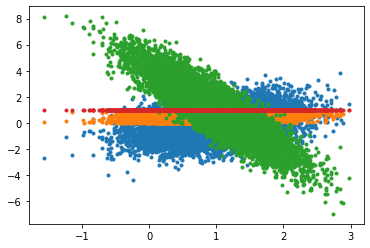

In [3]:
w = np.array([0.2, 0.5, -0.25, 1.0])
epsilon = np.random.normal(loc = 0, scale = 0.1, size = n)

y = np.inner(x,w) + epsilon

plt.plot(y, x, ".")

#### Loss

$$ \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j  )^2$$


$$grad_w L = \left[ \frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1} , ... \frac{\partial L}{ \partial w_{N-1}}  \right]$$

$$\frac{\partial L}{\partial w_0} = \frac{1}{N} \sum_{i=1}^{N-1} \left(y_i - x_{i0}w_0 \right)\cdot (-x_{i0})$$

$$\frac{\partial L}{\partial w_1} = \frac{1}{N} \sum_{i=1}^{N-1} \left(y_i - x_{i1}w_1 \right)\cdot (-x_{i1})$$

$$\frac{\partial L}{\partial w_2} = \frac{1}{N} \sum_{i=1}^{N-1} \left(y_i - x_{i2}w_2 \right)\cdot (-x_{i2})$$

$$\frac{\partial L}{\partial w_3} = \frac{1}{N} \sum_{i=1}^{N-1} \left(y_i - x_{i3}w_3 \right)\cdot (-x_{i3})$$

## Gradient descent 

### Problem 1 

Find the gradient of the loss function with respect to weights.

Write gradient function ``grad(y,x,w)``.

In [4]:
def calculate_loss_function(y,x,w):
    n = len(y)
    return 0.5/n*np.sum( (y-np.inner(x,w))**2)
    

In [5]:
def grad(y,x,w):
    n = len(y)
    return (1/n)*x.T.dot(x.dot(w)-y)

In [6]:
def show_weight_loss(loss_function_history, weight_history):
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.grid(True)

    axs[0].plot(loss_function_history)
    axs[0].set_xlabel('loss function')

    axs[1].plot(weight_history)
    axs[1].set_xlabel('weights')

    for i in range(4):
        axs[1].axhline(y = w[i], color = 'black')

    fig.tight_layout()
    plt.show()
    

### Problem 2

Implement gradient descent for linear regression.

In [7]:
def gradient_descent(y,x,w, learning_rate = 0.01, epochs = 2000):
    
    loss_function_history = []
    weight_history = []
    
    for epoch in range(epochs):
        loss = calculate_loss_function(y,x,w)              
        grad_w = grad(y,x,w)
        w = w - learning_rate * grad_w
        
        loss_function_history.append( loss )
        weight_history.append(w)
    
    return w, loss_function_history, weight_history

Get random weights, similar to the original ones

In [8]:
epsilon_0 = np.random.normal(loc = 0, scale = 0.5, size = 4)
w0 = w + epsilon_0

In [9]:
%%time
w_predicted_2, loss_function_history_2, weight_history_2 = gradient_descent(y,x,w0, epochs = n_epochs)

CPU times: user 2.34 s, sys: 55.1 ms, total: 2.39 s
Wall time: 1.2 s


In [10]:
loss_function_history_2[-1]

0.005049310902142248

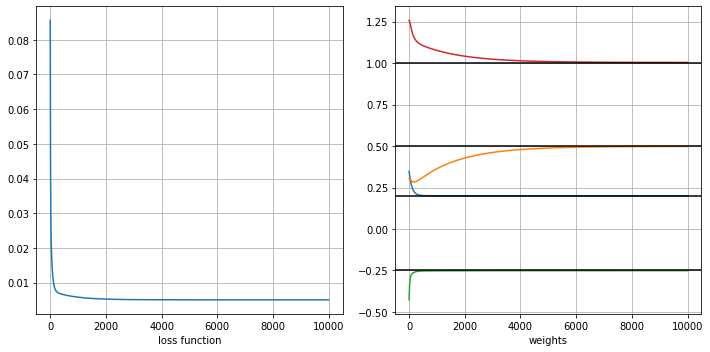

In [11]:
show_weight_loss(loss_function_history_2, weight_history_2)

### Problem 3

Implement stochastic gradient descent (SGD).

In [12]:
def stochastic_gradient_descent(y,x,w, learning_rate = 0.01, epochs = 2000):
    
    loss_function_history = []
    weight_history = []
    n = len(y)
    for epoch in range(epochs):
        index = np.random.randint(n)
        y0 = y[index]
        x0 = x[index]
        
        loss = calculate_loss_function(y,x,w)              
        grad_w = x0.T.dot(x0.dot(w)-y0)
        w = w - learning_rate * grad_w
        
        loss_function_history.append( loss )
        weight_history.append(w)
    
    return w, loss_function_history, weight_history

In [13]:
%%time
w_predicted_3, loss_function_history_3, weight_history_3 = stochastic_gradient_descent(y,x,w0, epochs = n_epochs)

CPU times: user 1.38 s, sys: 35.9 ms, total: 1.42 s
Wall time: 720 ms


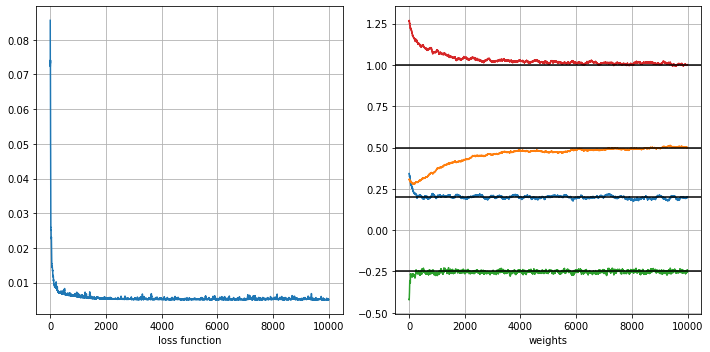

In [14]:
show_weight_loss(loss_function_history_3, weight_history_3)

### Problem 4

Implement SGD using pytorch. Start by just rewritting Problem 3 to use torch Tensors instead of numpy arrays. To convert from numpy arrays to torch tensors you can use ``torch.from_numpy()`` function. 

In [15]:
import torch

# X,W,W0 are formed used torch.from_numpy(x)
# to preserve the same values as in case of numpy operations

X = torch.from_numpy(x)
W = torch.from_numpy(np.matrix(w).T)
W0 = torch.from_numpy(np.matrix(w0).T)  # starting weights. random numbers
Epsilon = torch.from_numpy(np.matrix(epsilon).T)

Y = torch.matmul(X,W) + Epsilon

In [16]:
def calculate_loss_function(Y,X,W):
    n = len(Y)  
    return 0.5/n*torch.sum( (Y-  torch.matmul(X,W)  )**2)

In [17]:
def grad(Y,X,W):
    n = len(Y) 
    Yprim = (Y - torch.matmul(X,W))
    return (-1/n)*torch.matmul(X.transpose(0,1), Yprim)

In [18]:
def stochastic_grad(Y0,X0,W):  

    Yprim = (torch.matmul(X0,W) - Y0)
    return torch.mul(Yprim, X0) 

In [19]:
def stochastic_gradient_descent(Y,X,W, learning_rate = 0.01, epochs = 1000):
      
    loss_function_history = []
    weight_history = []
    n = len(Y)
    for epoch in range(epochs):
        index = np.random.randint(n)
        Y0 = Y[index]
        X0 = X[index]
        
        loss = calculate_loss_function(Y,X,W)              
        grad_W = stochastic_grad(Y0,X0,W).reshape([4,1])        
        #grad_W = torch.reshape(grad_W, [4,1])
        
        W -= learning_rate * grad_W
        
        loss_function_history.append( loss )
        weight_history.append(W)
    
    return W, loss_function_history, weight_history

In [20]:
%%time
w_predicted, loss_function_history, weight_history = stochastic_gradient_descent(Y,X,W0, epochs = n_epochs)

CPU times: user 2.48 s, sys: 84.1 ms, total: 2.56 s
Wall time: 1.28 s


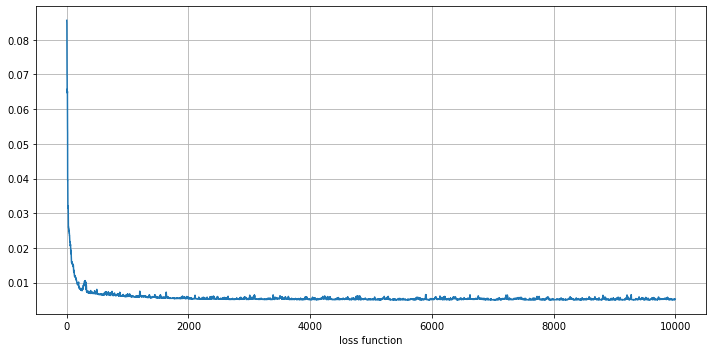

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.set_xlabel('epoch')
ax.grid(True)

ax.plot(loss_function_history)
ax.set_xlabel('loss function')

fig.tight_layout()
plt.show()

### Problem 5 

Implement GD using pytorch automatic differentiation.

To this end the variable with respect to which the gradient will be calculated, ``t_w`` in this case, must have attribute
``requires_grad`` set to ``True`` (``t_w.require_grad=True``).

The torch will automatically track any expression containing ``t_w`` and store its computational graph. The method ``backward()`` can be run on the final expression to back propagate the gradient e.g. ``loss.backward()``. Then the gradient is accesible as ``t_w.grad``.

In [22]:
# X,W,W0 are formed used torch.from_numpy(x)
# to preserve the same values as in case of numpy operations

X = torch.from_numpy(x)
W = torch.from_numpy(np.matrix(w).T)
W0 = torch.from_numpy(np.matrix(w0).T).requires_grad_(True)
Epsilon = torch.from_numpy(np.matrix(epsilon).T)

Y = torch.matmul(X,W) + Epsilon

W.requires_grad_(True)
W0.requires_grad_(True)

tensor([[ 0.3487],
        [ 0.3035],
        [-0.4349],
        [ 1.2571]], dtype=torch.float64, requires_grad=True)

In [23]:
def stochastic_gradient_descent_auto_diff(Y,X,W, learning_rate = 0.01, epochs = 2000):
    
    loss_function_history = []
    weight_history = []
    n = len(Y)
    
    for epoch in range(epochs):
        index = np.random.randint(n)
        Y0 = Y[index]
        X0 = X[index]
        
        if not ( W.grad is None):
            W.grad.data.zero_()

        loss = calculate_loss_function(Y,X,W)  
        loss.backward()
        W.data.sub_(learning_rate * W.grad)
       
        loss_function_history.append( loss )
        weight_history.append(W)
    
    return W, loss_function_history, weight_history

In [24]:
w_predicted

tensor([[ 0.1886],
        [ 0.4902],
        [-0.2440],
        [ 1.0101]], dtype=torch.float64)

In [25]:
%%time
w_predicted, loss_function_history, weight_history = stochastic_gradient_descent_auto_diff(Y,X,W0, epochs = n_epochs)

CPU times: user 12.9 s, sys: 7.17 s, total: 20 s
Wall time: 6.66 s


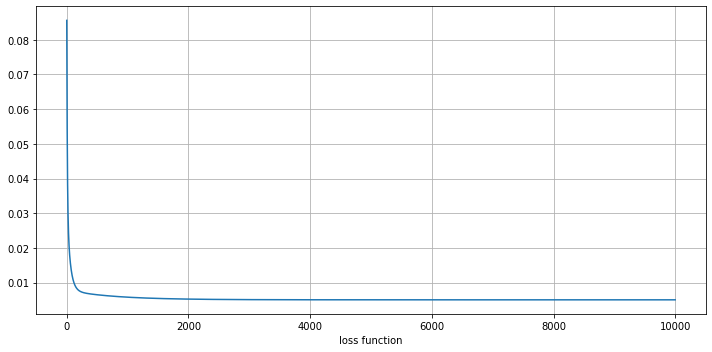

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.set_xlabel('epoch')
ax.grid(True)

ax.plot(loss_function_history)
ax.set_xlabel('loss function')

fig.tight_layout()
plt.show()
    